# Esercitazione1

## Esercizio 1.1

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Parte 1
Calcolo la media progressiva, e le relative incertezze, in funzione del numero di blocchi di un generatore  di numeri pseudo-casuali uniformemente distribuiti tra [0,1] ,utilizzando una classe per gestire e calcolare la statistica a blocchi di un array

Grafico della media progressiva, con relative incertezze del valor medio dei numeri pseudo casuali
calcolato utilizzando la statistica a blocchi

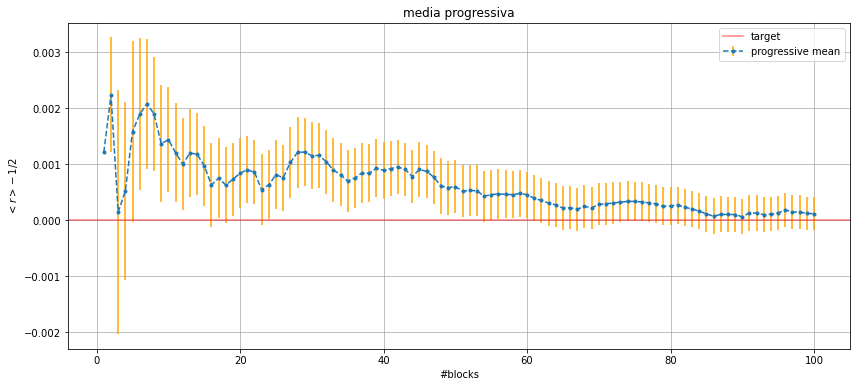

In [12]:
x,sum_prog, err=np.loadtxt('es1/stima_r.csv', delimiter=",", usecols=[0,1,2], unpack=True)
N_block=100

plt.figure(figsize=(14,6))
plt.axhline(0,color='red', alpha=0.5, label='target')
plt.errorbar(x/(np.max(x)/N_block),sum_prog-0.5,fmt='.--', ecolor='orange',yerr=err, label='progressive mean')
plt.xlabel('#blocks')
plt.ylabel(r'$<r>-1/2$')
plt.title('media progressiva')
plt.legend()
plt.grid(True)
plt.show()

### Parte 2
Calcolo la varianza progressiva, e le relative incertezze,di un generatore  di numeri pseudo-casuali uniformemente distribuiti tra [0,1] in funzione del numero di blocchi 

Grafico della valor medio progressivo della varianza, con relative incertezze del valor medio dei numeri pseudo casuali
calcolato utilizzando la statistica a blocchi

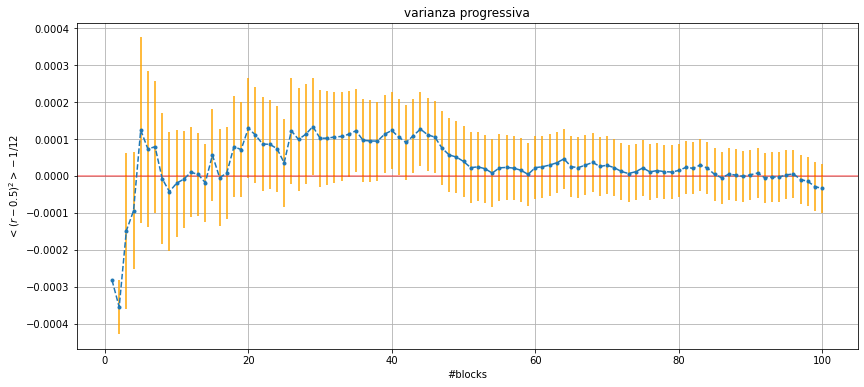

In [13]:
x,sum_prog, err=np.loadtxt('es1/stima_sigma2.csv', delimiter=",", usecols=[0,1,2], unpack=True)
N_block=100

plt.figure(figsize=(14,6))
plt.axhline(0,color='red', alpha=0.5, label='target')
plt.errorbar(x/(np.max(x)/N_block),sum_prog-1./12,fmt='.--', ecolor='orange',yerr=err, label='progressive variance')
plt.xlabel('#blocks')
plt.ylabel(r'$<(r-0.5)^2>-1/12$')
plt.title(r'varianza progressiva')
plt.grid(True)
plt.show()

### Parte 3 
Test del $\chi^2$ per valutare se la distribuzione dei numeri generati pseudo casualmente sia o meno uniforme.
Se $\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i} \sim 100$, allora la distribuzione è compatibile con essere uniforme

In [28]:
chi=np.loadtxt('es1/chi2.csv')

print(chi.mean(), "+-", np.sqrt(chi.var()))

99.7964 +- 12.355598692090966


Notiamo che sia la media che la varianza del nostro generatore di numeri pseudocasuali, all'aumentare del numero di blocchi,  diventano compatibili, entro le barre di errore, con i valori teorici attesi.

$<r>=\frac{1}{2}$, $<\sigma^2>=\frac{12}{12}$

======================================================================

## Esercizio 1.2: teorema del limite centrale

Testo il teorema del limite centrale andando a determinare la distribuzione di probabilità di $A_N$, dove
$$
A_N=\frac{1}{N}\sum_i^N x_i
$$
e dove $x_i$ sono le variabili casuali distribuite secondo rispettivamente una distribuzione

- distribuzione intera uniforme in [1,6] (facce di un dado)
- distribuzione esponenziale
- distribuzione di cauchy


Il teorema del limite centrale stabilisce che la distribuzione di probabilità della somma di N varabili casuali indipendenti, identicamente distribuite,  di media $<x> =\mu$  e varianza $\sigma^2<\infty$ tende, per $N\rightarrow \infty$, a una distribuzione gaussiana di media $<A_N>=\mu$ e varianza $\sigma_{A_N}^2=\sigma^2/N$

### Dado a 6 facce: distribuzione intera uniforme

In [18]:
S1,S2, S10, S100=np.loadtxt('es2/dado.csv', delimiter=",", usecols=[0,1,2,3], unpack=True)

#### Grafici

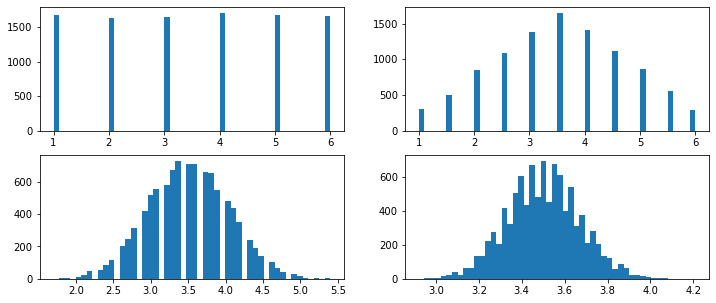

In [27]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,5))
bin=50
ax[0][0].hist(S1,bin)
ax[0][1].hist(S2,bin)
ax[1][0].hist(S10,bin)
ax[1][1].hist(S100,bin)
plt.show()

La distribuzione di probabilità di $A_N$ tende ad una distribuzione gaussiana consistente con aver media $<A_N>=3.5$

### Distribuzione esponenziale
$$
p(x)=\lambda e^{-\lambda x}
$$

$<x>=\frac{1}{\lambda}=1$

$\sigma^2=\frac{1}{\lambda^2}=1$

In [31]:
S1,S2, S10, S100=np.loadtxt('es2/exp.csv', delimiter=",", usecols=[0,1,2,3], unpack=True)

#### Grafici

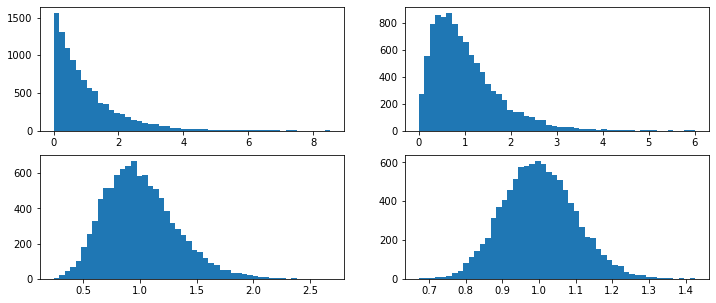

In [32]:
fig , ax = plt.subplots(nrows = 2, ncols = 2,figsize=(12,5))
bin=50
ax[0][0].hist(S1,bin)
ax[0][1].hist(S2,bin)
ax[1][0].hist(S10,bin)
ax[1][1].hist(S100,bin)
plt.show()

La distribuzione di $A_N$ tende ad una distribuzione gaussiana compatibile con aver media $<A_N>=1$

### Distribuzione di Cauchy
$$
p(x)=\frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2-\Gamma^2}
$$

With $\mu=0$, $\Gamma=1$, so that $<x>=0 $.

In [28]:
S1,S2, S10, S100=np.loadtxt('es2/cauchy.csv', delimiter=",", usecols=[0,1,2,3], unpack=True)

#### Grafici

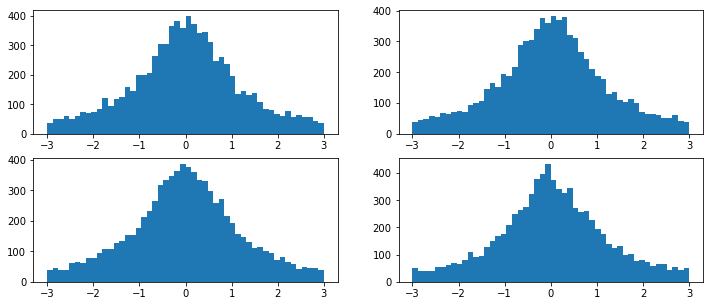

In [29]:
fig , ax = plt.subplots(nrows = 2, ncols = 2,figsize=(12,5))
bin=50
Range=(-3.,3.)
ax[0][0].hist(S1,bin,Range)
ax[0][1].hist(S2,bin,Range)
ax[1][0].hist(S10,bin,Range)
ax[1][1].hist(S100,bin,Range)
plt.show()

La distribuzione di $A_N$ sembra rimanere compatibile con una distribuzione Lorentiana di media nulla

=================================================================

## Esercizio 1.3: Stima di pi

Stima di $\pi$ con l'esperimento di Buffon
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

utilizzando la statistica a blocchi e parametri dell'esperimento
- $d=1$
- $L=0.83$
- $N_{thr}=13000$

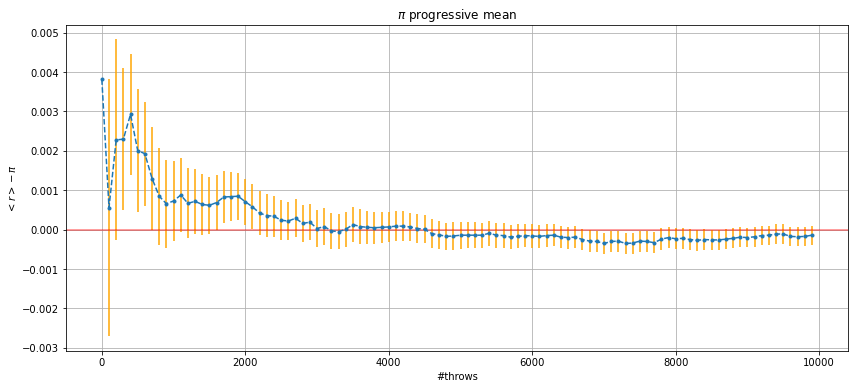

In [31]:
file=open('es3/stima_pi.csv')
x,sum_prog,err=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.figure(figsize=(14,6))
plt.axhline(0,color='red', alpha=0.5, label='target')
plt.errorbar(x,sum_prog-np.pi,fmt='.--', ecolor='orange',yerr=err)
plt.xlabel('#throws')
plt.title(f'$\pi$ progressive mean')
plt.ylabel(r'$<r>-\pi$')
plt.grid(True)
plt.show()

Il risultato sembra essere compatibile con il valore esatto di $\pi$